# **FPR**

*Rubén Martínez Sisó, Lucía Cárdenas Palacios*

---

# Table Of Contents
* [1. Introduction](#0)
* [2. Problem Definition](#0)
* [3. Prepare The Data](#0)
* [4. Data Understandind](#0)
* [5. First Iteration](#0)
* [6. Second Iteration](#0)
* [7. Third Iteration](#0)
* [8. Conclusions](#0)

# 1.    Introduction

*TEXT*

# 2.    Problem Definition

*TEXT*

# 3.    Prepare The Data 

## 3.1  Dependencies

In [133]:
# %pip install pd
# %pip install matplotlib
# %pip install plotly
# %pip install numpy
# %pip install requests
# %pip install seaborn
# %pip install torch
# %pip install numpy

In [134]:
# import math
# import matplotlib.cm as cm
# import os
# import pickle
# import plotly.express as px
# import plotly.graph_objects as go
# import requests
# import scipy
# import random
# import torch
# from torch.autograd import Variable
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
# from sklearn.model_selection import train_test_split, GridSearch
# from sklearn.preprocessing import LabelEncoder
# from sklearn.svm import SVC
# from sklearn.preprocessing import OneHotEncoder, scale

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as numpy

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from os import sep
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy_score
from sklearn.metrics import confusion_matrix as confusion_matrix

## 3.2  Data Loading

In [135]:
PATH_DATA_RAW = 'data_fitness' + sep + 'raw' + sep
fitness_raw = pd.read_csv(PATH_DATA_RAW + 'fitness analysis.csv')
pd.DataFrame()

""


## 3.3  Fitness Simplification

In [136]:
fitness_raw['How do you describe your current level of fitness ?'].value_counts()

Good         220
Average      195
Unfit         54
Very good     53
Perfect       23
Name: How do you describe your current level of fitness ?, dtype: int64

In [137]:
# fitness_mod = fitness_raw.replace({'How do you describe your current level of fitness ?': {
# "Unfit": 0, 
# "Average": 1, 
# "Good": 2, 
# "Very good": 3, 
# "Perfect": 4}})

fitness_mod = fitness_raw.replace({'How do you describe your current level of fitness ?': {
    "Unfit": 1,
    "Average": 1,
    "Good": 2,
    "Very good": 3,
    "Perfect": 3}})
    
fitness_mod['How do you describe your current level of fitness ?'].value_counts()


1    249
2    220
3     76
Name: How do you describe your current level of fitness ?, dtype: int64

# 4.    Data Understanding

## 4.1  First Look

In [138]:
fitness_mod.head()

,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,2,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,3,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,2,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,2019/07/04 5:43:35 AM GMT+5:30,Anusha,Female,15 to 18,4,2,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,2019/07/04 5:44:29 AM GMT+5:30,Nikkitha,Female,19 to 25,3,1,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit


In [139]:
fitness_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 18 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   Timestamp                                                                                                              545 non-null    object
 1   Your name                                                                                                              545 non-null    object
 2   Your gender                                                                                                            545 non-null    object
 3   Your age                                                                                                               545 non-null    object
 4   How impo

In [140]:
fitness_mod.isna().sum()

Timestamp                                                                                                                0
Your name                                                                                                                0
Your gender                                                                                                              0
Your age                                                                                                                 0
How important is exercise to you ?                                                                                       0
How do you describe your current level of fitness ?                                                                      0
How often do you exercise?                                                                                               0
What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)              0
What form(s) of 

*TEXT*

## 4.2  Column Study

*TEXT*

### 4.2.1   Name of the person attending the survey

In [141]:
fitness_mod['Your name '].value_counts()

Kousi           4
Murali          3
Priya           3
Sanjana         3
Rajesh          2
               ..
Manoji K        1
Sanjita         1
Cutie           1
Rhea            1
Mary Presley    1
Name: Your name , Length: 517, dtype: int64

### 4.2.2   Gender of the person attending the survey

Female    302
Male      243
Name: Your gender , dtype: int64

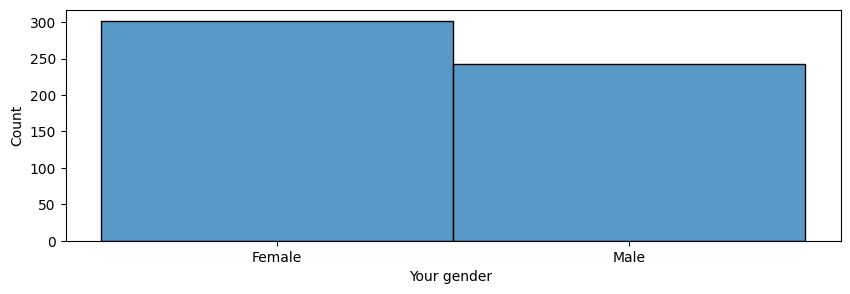

In [142]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'Your gender ')
fitness_mod['Your gender '].value_counts()

### 4.2.3   Age of the person attending the survey

19 to 25        236
15 to 18        167
40 and above     85
30 to 40         37
26 to 30         20
Name: Your age , dtype: int64

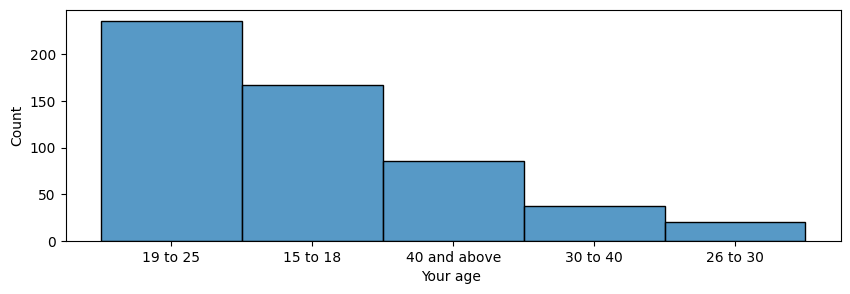

In [143]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'Your age ')
fitness_mod['Your age '].value_counts()

### 4.2.4   How important is an exercise to you on the scale of 1 to 5

5    181
4    174
3    144
2     38
1      8
Name: How important is exercise to you ?, dtype: int64

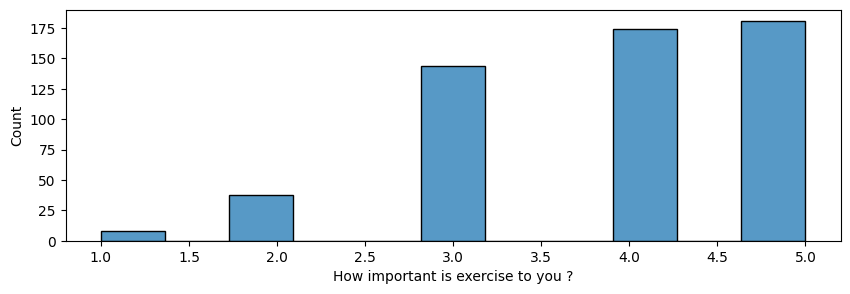

In [144]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'How important is exercise to you ?')
fitness_mod['How important is exercise to you ?'].value_counts()

### 4.2.5   How do you describe your current level of fitness?

1    249
2    220
3     76
Name: How do you describe your current level of fitness ?, dtype: int64

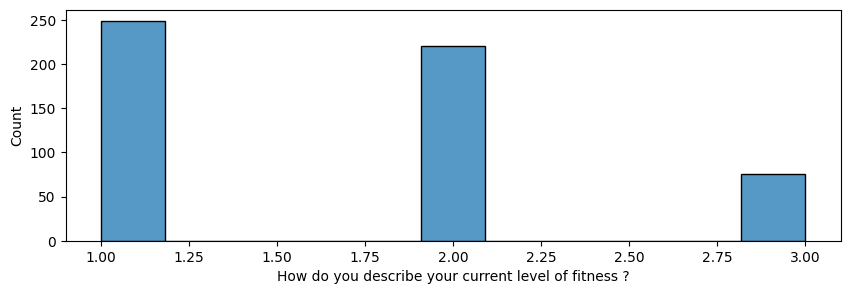

In [145]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'How do you describe your current level of fitness ?')
fitness_mod['How do you describe your current level of fitness ?'].value_counts()

### 4.2.6   How often do you exercise?

1 to 2 times a week    148
Never                  124
2 to 3 times a week     78
3 to 4 times a week     77
Everyday                69
5 to 6 times a week     49
Name: How often do you exercise?, dtype: int64

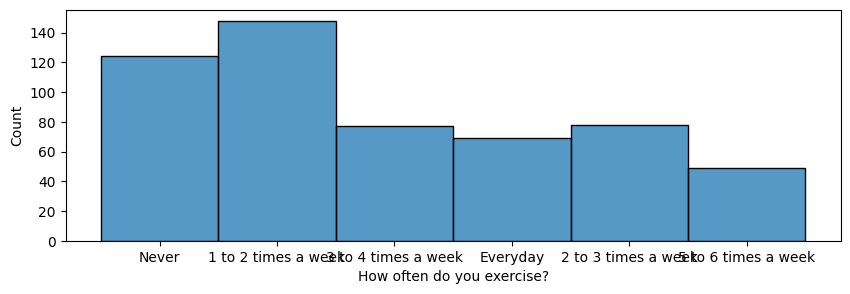

In [146]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'How often do you exercise?')
fitness_mod['How often do you exercise?'].value_counts()

### 4.2.7   What barriers, if any, prevent you from exercising more regularly?

In [147]:
fitness_mod['What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)'].value_counts()

I don't have enough time                                                                                       160
I can't stay motivated                                                                                          74
I exercise regularly with no barriers                                                                           60
I don't have enough time;I can't stay motivated                                                                 52
I'll become too tired                                                                                           42
I don't really enjoy exercising                                                                                 25
I don't have enough time;I'll become too tired                                                                  25
I have an injury                                                                                                12
I don't have enough time;I can't stay motivated;I'll become too tired           

### 4.2.8   What forms of exercise do you currently participate in?

In [148]:
fitness_mod['What form(s) of exercise do you currently participate in ?                        (Please select all that apply)'].value_counts()

Walking or jogging                                                             153
I don't really exercise                                                         77
Gym                                                                             44
Walking or jogging;Yoga                                                         26
Walking or jogging;Gym                                                          26
Team sport                                                                      26
Walking or jogging;Team sport                                                   25
Yoga                                                                            25
Walking or jogging;Gym;Lifting weights                                          13
Walking or jogging;I don't really exercise                                      10
Gym;Team sport                                                                   9
Zumba dance                                                                      9
Walk

### 4.2.9   Do you exercise... ?

Alone                         289
I don't really exercise        89
With a friend                  85
With a group                   66
Within a class environment     16
Name: Do you exercise ___________ ?, dtype: int64

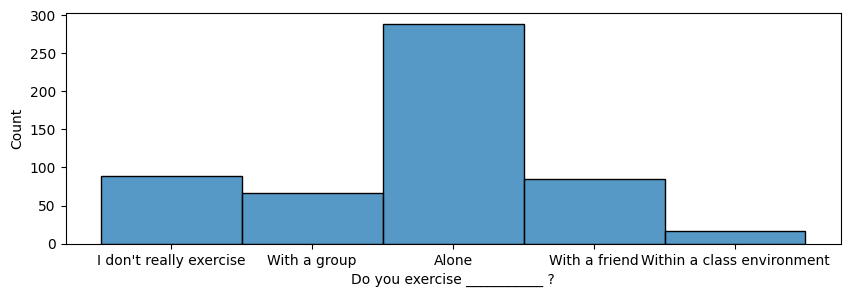

In [149]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'Do you exercise ___________ ?')
fitness_mod['Do you exercise ___________ ?'].value_counts()

### 4.2.10  What time of the day do you prefer to exercise?

Early morning    300
Evening          235
Afternoon         10
Name: What time if the day do you prefer to exercise?, dtype: int64

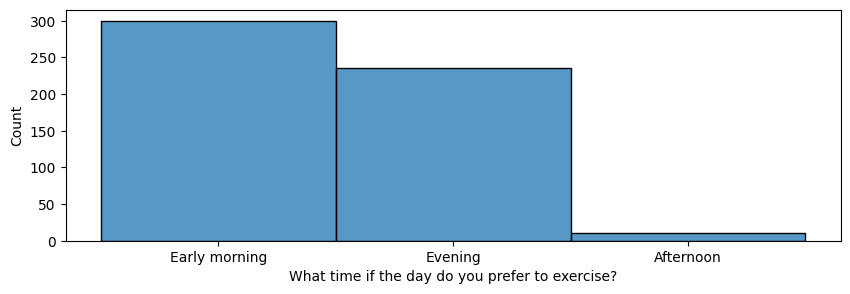

In [150]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'What time if the day do you prefer to exercise?')
fitness_mod['What time if the day do you prefer to exercise?'].value_counts()

### 4.2.11  How long do you spend exercising per day?

30 minutes                 203
1 hour                     167
I don't really exercise    105
2 hours                     64
3 hours and above            6
Name: How long do you spend exercising per day ?, dtype: int64

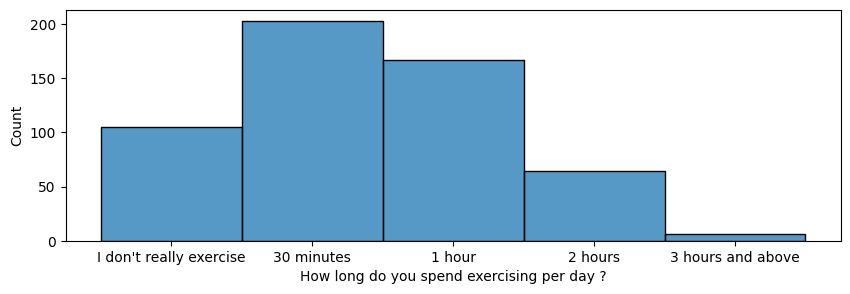

In [151]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'How long do you spend exercising per day ?')
fitness_mod['How long do you spend exercising per day ?'].value_counts()

### 4.2.12  Would you say, you eat a healthy balanced diet?

Not always    327
Yes           115
No            103
Name: Would you say you eat a healthy balanced diet ?, dtype: int64

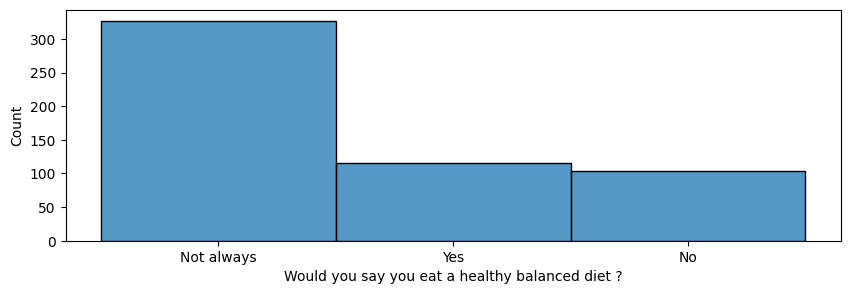

In [152]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'Would you say you eat a healthy balanced diet ?')
fitness_mod['Would you say you eat a healthy balanced diet ?'].value_counts()

### 4.2.13  What prevents you from eating a healthy balanced diet, if any?

In [153]:
fitness_mod['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'].value_counts()

Temptation and cravings                                                  210
Lack of time                                                              88
Ease of access to fast food;Temptation and cravings                       76
Ease of access to fast food                                               56
I have a balanced diet                                                    42
Lack of time;Temptation and cravings                                      15
Cost                                                                      13
Lack of time;Ease of access to fast food;Temptation and cravings          10
Lack of time;Ease of access to fast food                                   9
Cost;Ease of access to fast food                                           6
Lack of time;Cost                                                          5
Cost;Ease of access to fast food;Temptation and cravings                   2
Lack of time;Cost;Ease of access to fast food;Temptation and cravings      2

### 4.2.14  How healthy do you consider yourself on a scale of 1 to 5?

3    301
4    151
2     48
5     32
1     13
Name: How healthy do you consider yourself?, dtype: int64

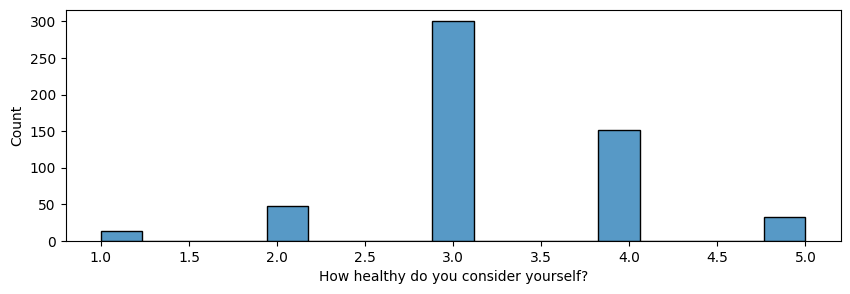

In [154]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'How healthy do you consider yourself?')
fitness_mod['How healthy do you consider yourself?'].value_counts()

### 4.2.15  Have you recommended your friends to follow a fitness routine? 

Yes    351
No     194
Name: Have you ever recommended your friends to follow a fitness routine?, dtype: int64

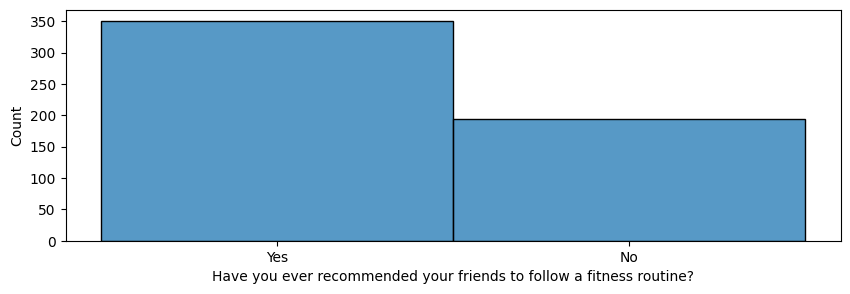

In [155]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'Have you ever recommended your friends to follow a fitness routine?')
fitness_mod['Have you ever recommended your friends to follow a fitness routine?'].value_counts()

### 4.2.16  Have you ever purchased fitness equipment?

No     340
Yes    205
Name: Have you ever purchased a fitness equipment?, dtype: int64

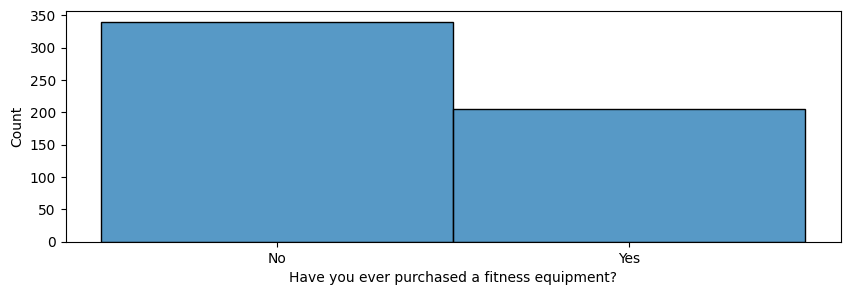

In [156]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'Have you ever purchased a fitness equipment?')
fitness_mod['Have you ever purchased a fitness equipment?'].value_counts()

### 4.2.17  What motivates you to exercise?

In [157]:
fitness_mod['What motivates you to exercise?         (Please select all that applies )'].value_counts()

I want to be fit                                                                                                        88
I want to be fit;I want to lose weight                                                                                  43
I want to lose weight                                                                                                   43
I'm sorry ... I'm not really interested in exercising                                                                   36
I want to relieve stress                                                                                                33
                                                                                                                        ..
I want to be fit;I want to think clearly and I want to play cricket with my grandkids                                    1
I want to increase muscle mass and strength;I want to achieve a sporting goal                                            1
I dont wanna gai

## 4.3  Relevant Observations

*TEXT*

# 5.    First Iteration

*TEXT*

* Drop columns with unique answers
* Drop columns with multiple answers
* Change every string value to integer value
* Ignore outliers
* Train-test Split
* Logistic Regression model

## 5.1  Data Preparation

### 5.1.1   Drop columns with unique answers

In [158]:
fitness1_1 = fitness_mod.copy(deep = True)

fitness1_1 = fitness1_1.drop(['Timestamp'], axis=1)
fitness1_1 = fitness1_1.drop(['Your name '], axis=1)

### 5.1.2   Drop columns with multiple answers

In [159]:
fitness1_2 = fitness1_1.copy(deep = True)

fitness1_2 = fitness1_2.drop(['What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)'], axis=1)
fitness1_2 = fitness1_2.drop(['What form(s) of exercise do you currently participate in ?                        (Please select all that apply)'], axis=1)
fitness1_2 = fitness1_2.drop(['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'], axis=1)
fitness1_2 = fitness1_2.drop(['What motivates you to exercise?         (Please select all that applies )'], axis=1)

### 5.1.3  Change every string value to integer value

In [160]:
# "4. How important is an exercise to you on the scale of 1 to 5" with integer values
# "14. How healthy do you consider yourself on a scale of 1 to 5?" with integer values
# "5. How do you describe your current level of fitness?" replaced at the top of the project

fitness1_3 = fitness1_2.copy(deep = True)

fitness1_3 = fitness1_3.replace({'Your gender ': 
{"Female": 0,
"Male": 1}})

fitness1_3 = fitness1_3.replace({'Your age ': 
{"19 to 25": 0,
"15 to 18": 1,
"40 and above": 2,
"30 to 40": 3,
"26 to 30": 4}})

fitness1_3 = fitness1_3.replace({'How often do you exercise?': 
{"1 to 2 times a week": 0,
"Never": 1,
"2 to 3 times a week": 2,
"3 to 4 times a week": 3,
"Everyday": 4,
"5 to 6 times a week": 5}})

fitness1_3 = fitness1_3.replace({'Do you exercise ___________ ?': 
{"Alone": 0,
"I don't really exercise": 1,
"With a friend": 2,
"With a group": 3,
"Within a class environment": 4}})

fitness1_3 = fitness1_3.replace({'What time if the day do you prefer to exercise?': 
{"Early morning": 0,
"Evening": 1,
"Afternoon": 2}})

fitness1_3 = fitness1_3.replace({'How long do you spend exercising per day ?': 
{"30 minutes": 0,
"1 hour": 1, 
"I don't really exercise": 2, 
"2 hours": 3, 
"3 hours and above": 4}})

fitness1_3 = fitness1_3.replace({'Would you say you eat a healthy balanced diet ?': 
{"Not always": 0,
"Yes": 1,
"No": 2 }})

fitness1_3 = fitness1_3.replace({'Have you ever recommended your friends to follow a fitness routine?': 
{"Yes": 0,
"No": 1}})

fitness1_3 = fitness1_3.replace({'Have you ever purchased a fitness equipment?': 
{"Yes": 0,
"No": 1}})

### 5.1.4   Train-test Split

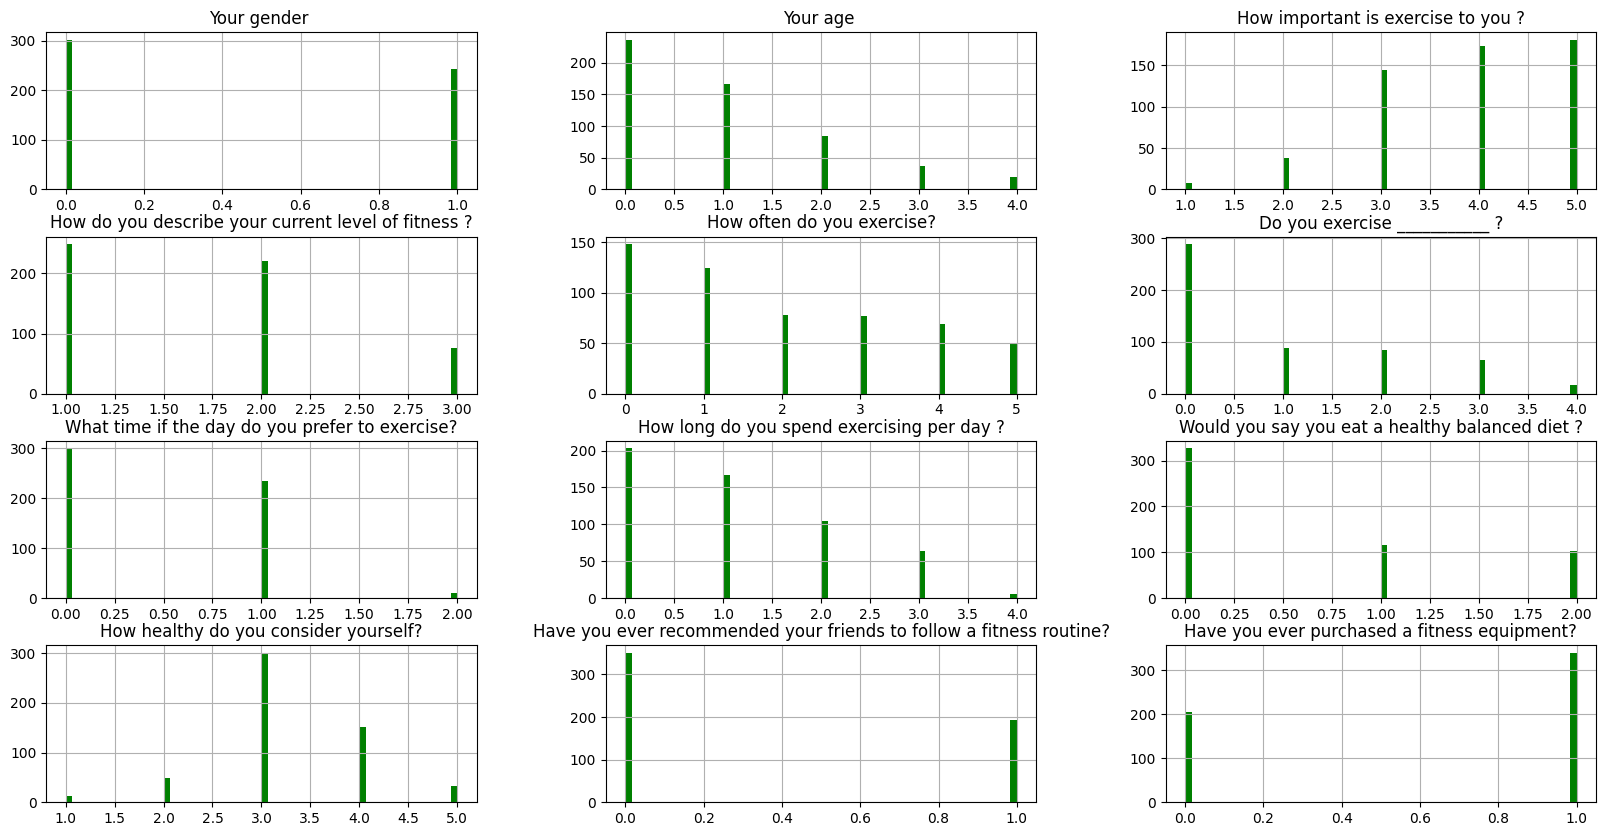

In [161]:
fitness1_3.hist(bins=60, figsize=(20,10), color='green')
plt.show()

1    249
2    220
3     76
Name: How do you describe your current level of fitness ?, dtype: int64

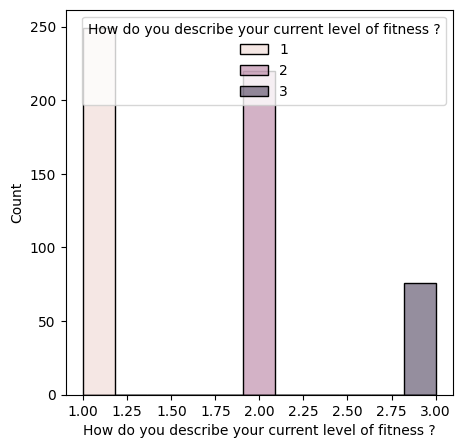

In [162]:
plt.figure(figsize=(5,5))
sns.histplot(data = fitness1_3, x = 'How do you describe your current level of fitness ?', hue = 'How do you describe your current level of fitness ?')
fitness1_3['How do you describe your current level of fitness ?'].value_counts()

In [163]:
x = fitness1_3.drop(['How do you describe your current level of fitness ?'], axis=1)
y = fitness1_3['How do you describe your current level of fitness ?']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

## 5.2  Modeling & Evaluation

### 5.2.1   Logistic Regression

In [164]:
# lr = LogisticRegression(random_state=40)
lr = LogisticRegression(penalty = 'l2', C = 10, random_state = 0)
print(lr.get_params())

{'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [165]:
lr.fit(X_train,y_train)

C:\Users\ruben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, random_state=0)

In [166]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: {:d}%'.format(int(accuracy * 100)))

Accuracy: 57%


### 5.2.2  Performance Evaluation

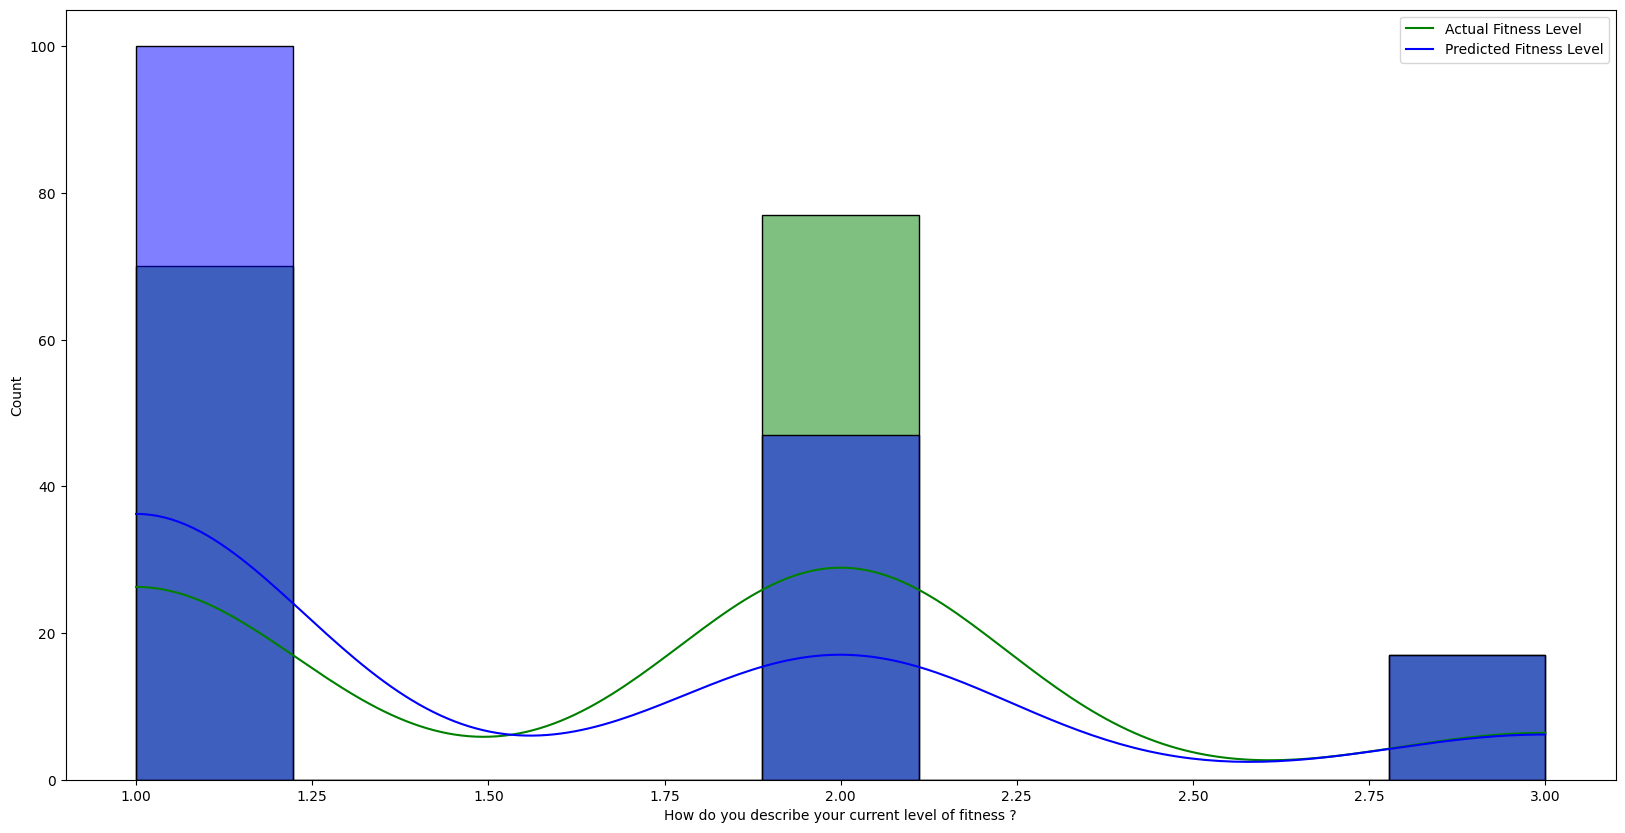

In [167]:
plt.figure(figsize=(20,10))
sns.histplot(data = y_test, kde = True, color='g')
sns.histplot(data = y_pred, kde = True, color='b')
plt.legend(labels=["Actual Fitness Level","Predicted Fitness Level"])

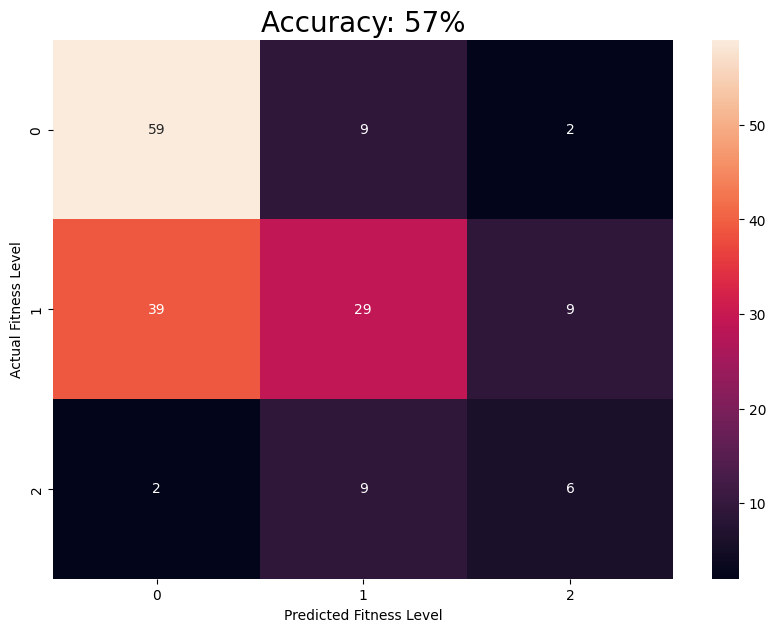

In [168]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.xlabel('Predicted Fitness Level')
plt.ylabel('Actual Fitness Level')
plt.title('Accuracy: {:d}%'.format(int(accuracy * 100)), size = 20)
plt.show()

*TEXT*

## 5.3  Following Iteration

*TEXT*

# 6.    Second Iteration

*TEXT*

* Drop columns with unique answers
* NEW: Treat columns with multiple answers
* Change every string value to integer value
* NEW: Outliers treatment
* NEW: Decision Tree model

## 6.1  Data Preparation

### 6.1.1   Drop columns with unique answers

In [169]:
fitness2_1 = fitness_mod.copy(deep = True)

fitness2_1 = fitness2_1.drop(['Timestamp'], axis=1)
fitness2_1 = fitness2_1.drop(['Your name '], axis=1)

### 6.1.2   Treat columns with multiple answer

In [170]:
#fitness1_2 = fitness1_2.drop(['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'], axis=1)

fitness2_2 = fitness2_1.copy(deep = True)

fitness2_2 = fitness2_2.drop(['What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)'], axis=1)
fitness2_2 = fitness2_2.drop(['What form(s) of exercise do you currently participate in ?                        (Please select all that apply)'], axis=1)
fitness2_2 = fitness2_2.drop(['What motivates you to exercise?         (Please select all that applies )'], axis=1)

In [171]:
fitness2_2 = fitness2_2.replace({'What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)': 
{"Temptation and cravings": 0,
 "Lack of time": 1,
  "Ease of access to fast food;Temptation and cravings": 3,
  "Ease of access to fast food": 3,
  "I have a balanced diet": 4,
  "Lack of time;Temptation and cravings": 1,
  "Cost": 5,
  "Lack of time;Ease of access to fast food;Temptation and cravings": 3,
  "Lack of time;Ease of access to fast food": 1,
  "Cost;Ease of access to fast food": 5,
  "Lack of time;Cost": 5,
  "Cost;Ease of access to fast food;Temptation and cravings": 3,
  "Lack of time;Cost;Ease of access to fast food;Temptation and cravings": 3,
  "Cost;Temptation and cravings": 5,
  "Ease of access to fast food;I have a balanced diet": 4,
  "I do not measure. I can't say for sure if my diet is balanced. ": 3,
  "Alcohol does me a good diet": 4,
  "Lack of time;Cost;Temptation and cravings": 3,
  "Rarely eat fast food": 4,
  "Temptation and cravings;I have a balanced diet": 4,
  "i don't have a proper diet": 3,
  "Social circle ": 4
  }})

fitness2_2['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'].value_counts()

0    210
3    149
1    112
4     48
5     26
Name: What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply), dtype: int64

### 6.1.3   Change every string value to integer value

In [172]:
# "4. How important is an exercise to you on the scale of 1 to 5" with integer values
# "14. How healthy do you consider yourself on a scale of 1 to 5?" with integer values
# "5. How do you describe your current level of fitness?" replaced at the top of the project

fitness2_3 = fitness2_2.copy(deep = True)

fitness2_3 = fitness2_3.replace({'Your gender ': 
{"Female": 0,
"Male": 1}})

fitness2_3 = fitness2_3.replace({'Your age ': 
{"19 to 25": 0,
"15 to 18": 1, 
"40 and above": 2, 
"30 to 40": 3, 
"26 to 30": 4}})

fitness2_3 = fitness2_3.replace({'How often do you exercise?': 
{"1 to 2 times a week": 0, 
"Never": 1, 
"2 to 3 times a week": 2, 
"3 to 4 times a week": 3, 
"Everyday": 4, 
"5 to 6 times a week": 5}})

fitness2_3 = fitness2_3.replace({'Do you exercise ___________ ?': 
{"Alone": 0, 
"I don't really exercise": 1, 
"With a friend": 2, 
"With a group": 3, 
"Within a class environment": 4}})

fitness2_3 = fitness2_3.replace({'What time if the day do you prefer to exercise?': 
{"Early morning": 0, 
"Evening": 1, 
"Afternoon": 2}})

fitness2_3 = fitness2_3.replace({'How long do you spend exercising per day ?': 
{"30 minutes": 0, 
"1 hour": 1, 
"I don't really exercise": 2, 
"2 hours": 3, 
"3 hours and above": 4}})

fitness2_3 = fitness2_3.replace({'Would you say you eat a healthy balanced diet ?': 
{"Not always": 0, 
"Yes": 1, 
"No": 2, 
"2 hours": 3}})

fitness2_3 = fitness2_3.replace({'Have you ever recommended your friends to follow a fitness routine?': 
{"Yes": 0, 
"No": 1}})

fitness2_3 = fitness2_3.replace({'Have you ever purchased a fitness equipment?': 
{"Yes": 0, 
"No": 1}})

### 6.1.4   Outliers treatment

In [173]:
fitness2_4 = fitness2_3.copy(deep = True)

In [174]:
fitness2_4_pc = fitness2_4.copy(deep = True)
Q1 = fitness2_4_pc.quantile(0.25) # 0.25
Q3 = fitness2_4_pc.quantile(0.75) # 0.75
IQR = Q3 - Q1
print(IQR)

Your gender                                                                                                              1.0
Your age                                                                                                                 2.0
How important is exercise to you ?                                                                                       2.0
How do you describe your current level of fitness ?                                                                      1.0
How often do you exercise?                                                                                               3.0
Do you exercise ___________ ?                                                                                            2.0
What time if the day do you prefer to exercise?                                                                          1.0
How long do you spend exercising per day ?                                                                               2.0


In [175]:
fitness2_4_pc_out = fitness2_4_pc[~((fitness2_4_pc < (Q1 - 1.5 * IQR)) |(fitness2_4_pc > (Q3 + 1.5 * IQR))).any(axis=1)]


In [176]:
i, _ = fitness2_4.shape
o, _ = fitness2_4_pc_out.shape
print("Removed", i-o,"rows")
print("Rows count reduced from", i, "to", o,"resulting in", int((o/i)*100), "% of the initial rows" )

Removed 13 rows
Rows count reduced from 545 to 532 resulting in 97 % of the initial rows


In [177]:
fitness2_4 = fitness2_4_pc_out.copy(deep = True)

### 6.1.5   Train-test Split

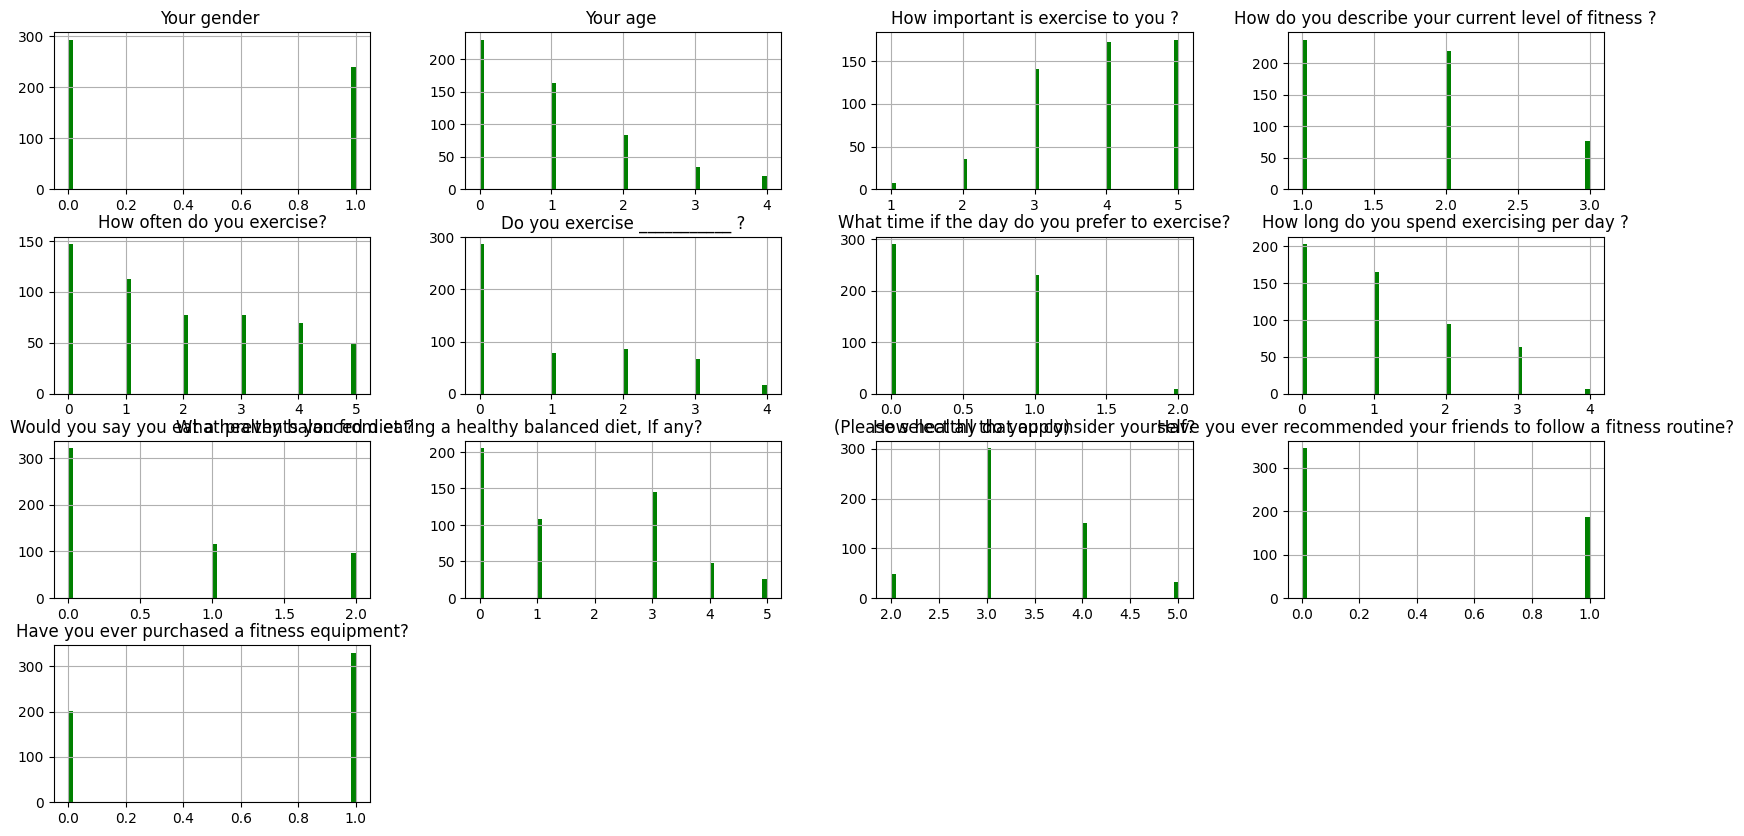

In [178]:
fitness2_4.hist(bins=60, figsize=(20,10), color='green')
plt.show()

1    237
2    219
3     76
Name: How do you describe your current level of fitness ?, dtype: int64

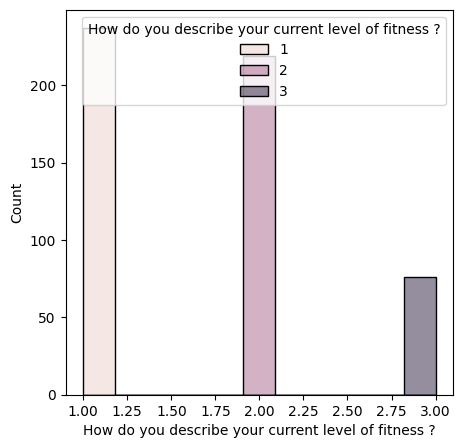

In [179]:
plt.figure(figsize=(5,5))
sns.histplot(data = fitness2_4, x = 'How do you describe your current level of fitness ?', hue = 'How do you describe your current level of fitness ?')
fitness2_4['How do you describe your current level of fitness ?'].value_counts()

In [180]:
x = fitness2_4.drop(['How do you describe your current level of fitness ?'], axis=1)
y = fitness2_4['How do you describe your current level of fitness ?']
#X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

## 6.2  Modeling & Evaluation

### 6.2.1   Decision Tree

In [181]:
#dt = DecisionTreeClassifier(criterion='gini',splitter='best')
#dt = DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=3)
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
max_features=None, max_leaf_nodes=None,
min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.0,
random_state=None, splitter='best')
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [182]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [183]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: {:d}%'.format(int(accuracy * 100)))

Accuracy: 59%


### 6.2.2  Performance Evaluation

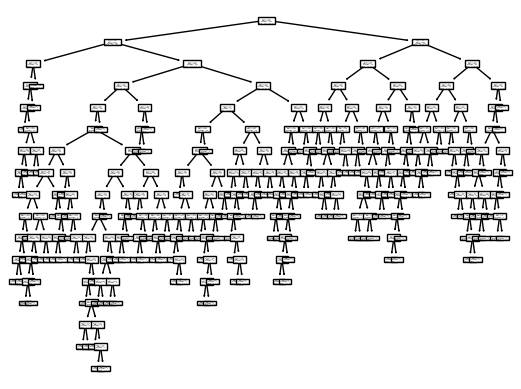

In [184]:
tree.plot_tree(dt)
plt.show()

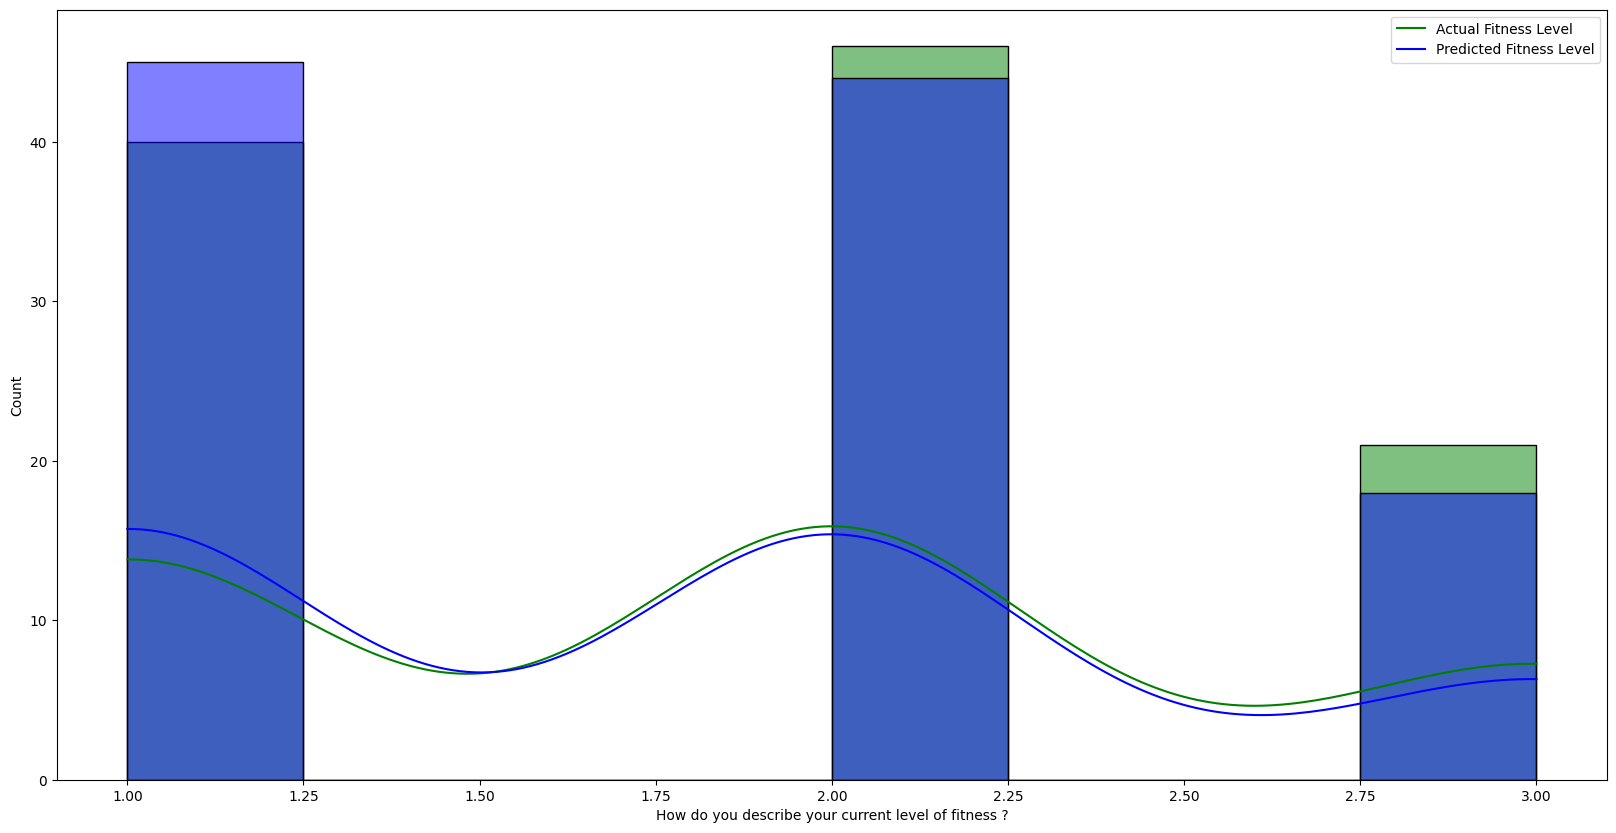

In [185]:
plt.figure(figsize=(20,10))
sns.histplot(data = y_test, kde = True, color='g')
sns.histplot(data = y_pred, kde = True, color='b')
plt.legend(labels=["Actual Fitness Level","Predicted Fitness Level"])

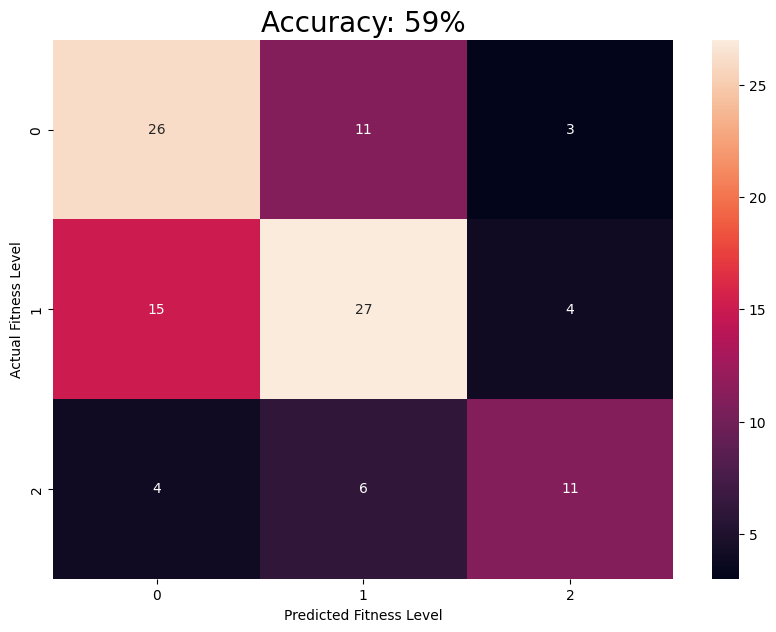

In [186]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.xlabel('Predicted Fitness Level')
plt.ylabel('Actual Fitness Level')
plt.title('Accuracy: {:d}%'.format(int(accuracy * 100)), size = 20)
plt.show()

*TEXT*

### 6.3  Following Iteration

*TEXT*

# 7.    Third Iteration

*TEXT*

* Drop columns with unique answers
* Treat columns with multiple answers
* NEW: Group similar answers
* Change every string value to integer value
* NEW: Drop irrelevant columns
* Outliers treatment
* NEW: Random Forest model

## 7.1  Data Preparation

### 7.1.1   Drop columns with unique answers

In [187]:
fitness3_1 = fitness_mod.copy(deep = True)

fitness3_1 = fitness3_1.drop(['Timestamp'], axis=1)
fitness3_1 = fitness3_1.drop(['Your name '], axis=1)

### 7.1.2   Treat columns with multiple answers

In [188]:
#fitness1_2 = fitness1_2.drop(['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'], axis=1)

fitness3_2 = fitness3_1.copy(deep = True)

fitness3_2 = fitness3_2.drop(['What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)'], axis=1)
fitness3_2 = fitness3_2.drop(['What form(s) of exercise do you currently participate in ?                        (Please select all that apply)'], axis=1)
fitness3_2 = fitness3_2.drop(['What motivates you to exercise?         (Please select all that applies )'], axis=1)

In [189]:
fitness3_2 = fitness3_2.replace({'What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)': 
{"Temptation and cravings": 0,
 "Lack of time": 1,
  "Ease of access to fast food;Temptation and cravings": 3,
  "Ease of access to fast food": 3,
  "I have a balanced diet": 4,
  "Lack of time;Temptation and cravings": 1,
  "Cost": 5,
  "Lack of time;Ease of access to fast food;Temptation and cravings": 3,
  "Lack of time;Ease of access to fast food": 1,
  "Cost;Ease of access to fast food": 5,
  "Lack of time;Cost": 5,
  "Cost;Ease of access to fast food;Temptation and cravings": 3,
  "Lack of time;Cost;Ease of access to fast food;Temptation and cravings": 3,
  "Cost;Temptation and cravings": 5,
  "Ease of access to fast food;I have a balanced diet": 4,
  "I do not measure. I can't say for sure if my diet is balanced. ": 3,
  "Alcohol does me a good diet": 4,
  "Lack of time;Cost;Temptation and cravings": 3,
  "Rarely eat fast food": 4,
  "Temptation and cravings;I have a balanced diet": 4,
  "i don't have a proper diet": 3,
  "Social circle ": 4
  }})

fitness2_2['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'].value_counts()

0    210
3    149
1    112
4     48
5     26
Name: What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply), dtype: int64

### 7.1.3   Group similar answers

In [190]:
fitness3_3 = fitness3_2.copy(deep = True)

# "30 minutes" and "1 hour"
fitness3_3 = fitness3_3.replace({'How long do you spend exercising per day ?': 
{"30 minutes": 0,
"1 hour": 0, 
"I don't really exercise": 2, 
"2 hours": 3, 
"3 hours and above": 4}})


### 7.1.4   Change every string value to integer value

In [191]:
# "4. How important is an exercise to you on the scale of 1 to 5" with integer values
# "14. How healthy do you consider yourself on a scale of 1 to 5?" with integer values
# "5. How do you describe your current level of fitness?" replaced at the top of the project

fitness3_4 = fitness3_3.copy(deep = True)

fitness3_4 = fitness3_4.replace({'Your gender ': 
{"Female": 0,
"Male": 1}})

fitness3_4 = fitness3_4.replace({'Your age ': 
{"19 to 25": 0,
"15 to 18": 1,
"40 and above": 2,
"30 to 40": 3,
"26 to 30": 4}})

fitness3_4 = fitness3_4.replace({'How often do you exercise?': 
{"1 to 2 times a week": 0,
"Never": 1,
"2 to 3 times a week": 2,
"3 to 4 times a week": 3,
"Everyday": 4,
"5 to 6 times a week": 5}})

fitness3_4 = fitness3_4.replace({'Do you exercise ___________ ?': 
{"Alone": 0,
"I don't really exercise": 1,
"With a friend": 2,
"With a group": 3,
"Within a class environment": 4}})

fitness3_4 = fitness3_4.replace({'What time if the day do you prefer to exercise?': 
{"Early morning": 0,
"Evening": 1,
"Afternoon": 2}})

fitness3_4 = fitness3_4.replace({'Would you say you eat a healthy balanced diet ?': 
{"Not always": 0,
"Yes": 1,
"No": 2 }})

fitness3_4 = fitness3_4.replace({'Have you ever recommended your friends to follow a fitness routine?': 
{"Yes": 0,
"No": 1}})

fitness3_4 = fitness3_4.replace({'Have you ever purchased a fitness equipment?': 
{"Yes": 0,
"No": 1}})

### 7.1.5   Drop irrelevant columns

In [192]:
fitness3_5 = fitness3_4.copy(deep = True)

C:\Users\ruben\AppData\Local\Temp\ipykernel_7812\2065487765.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat,dtype = np.bool)


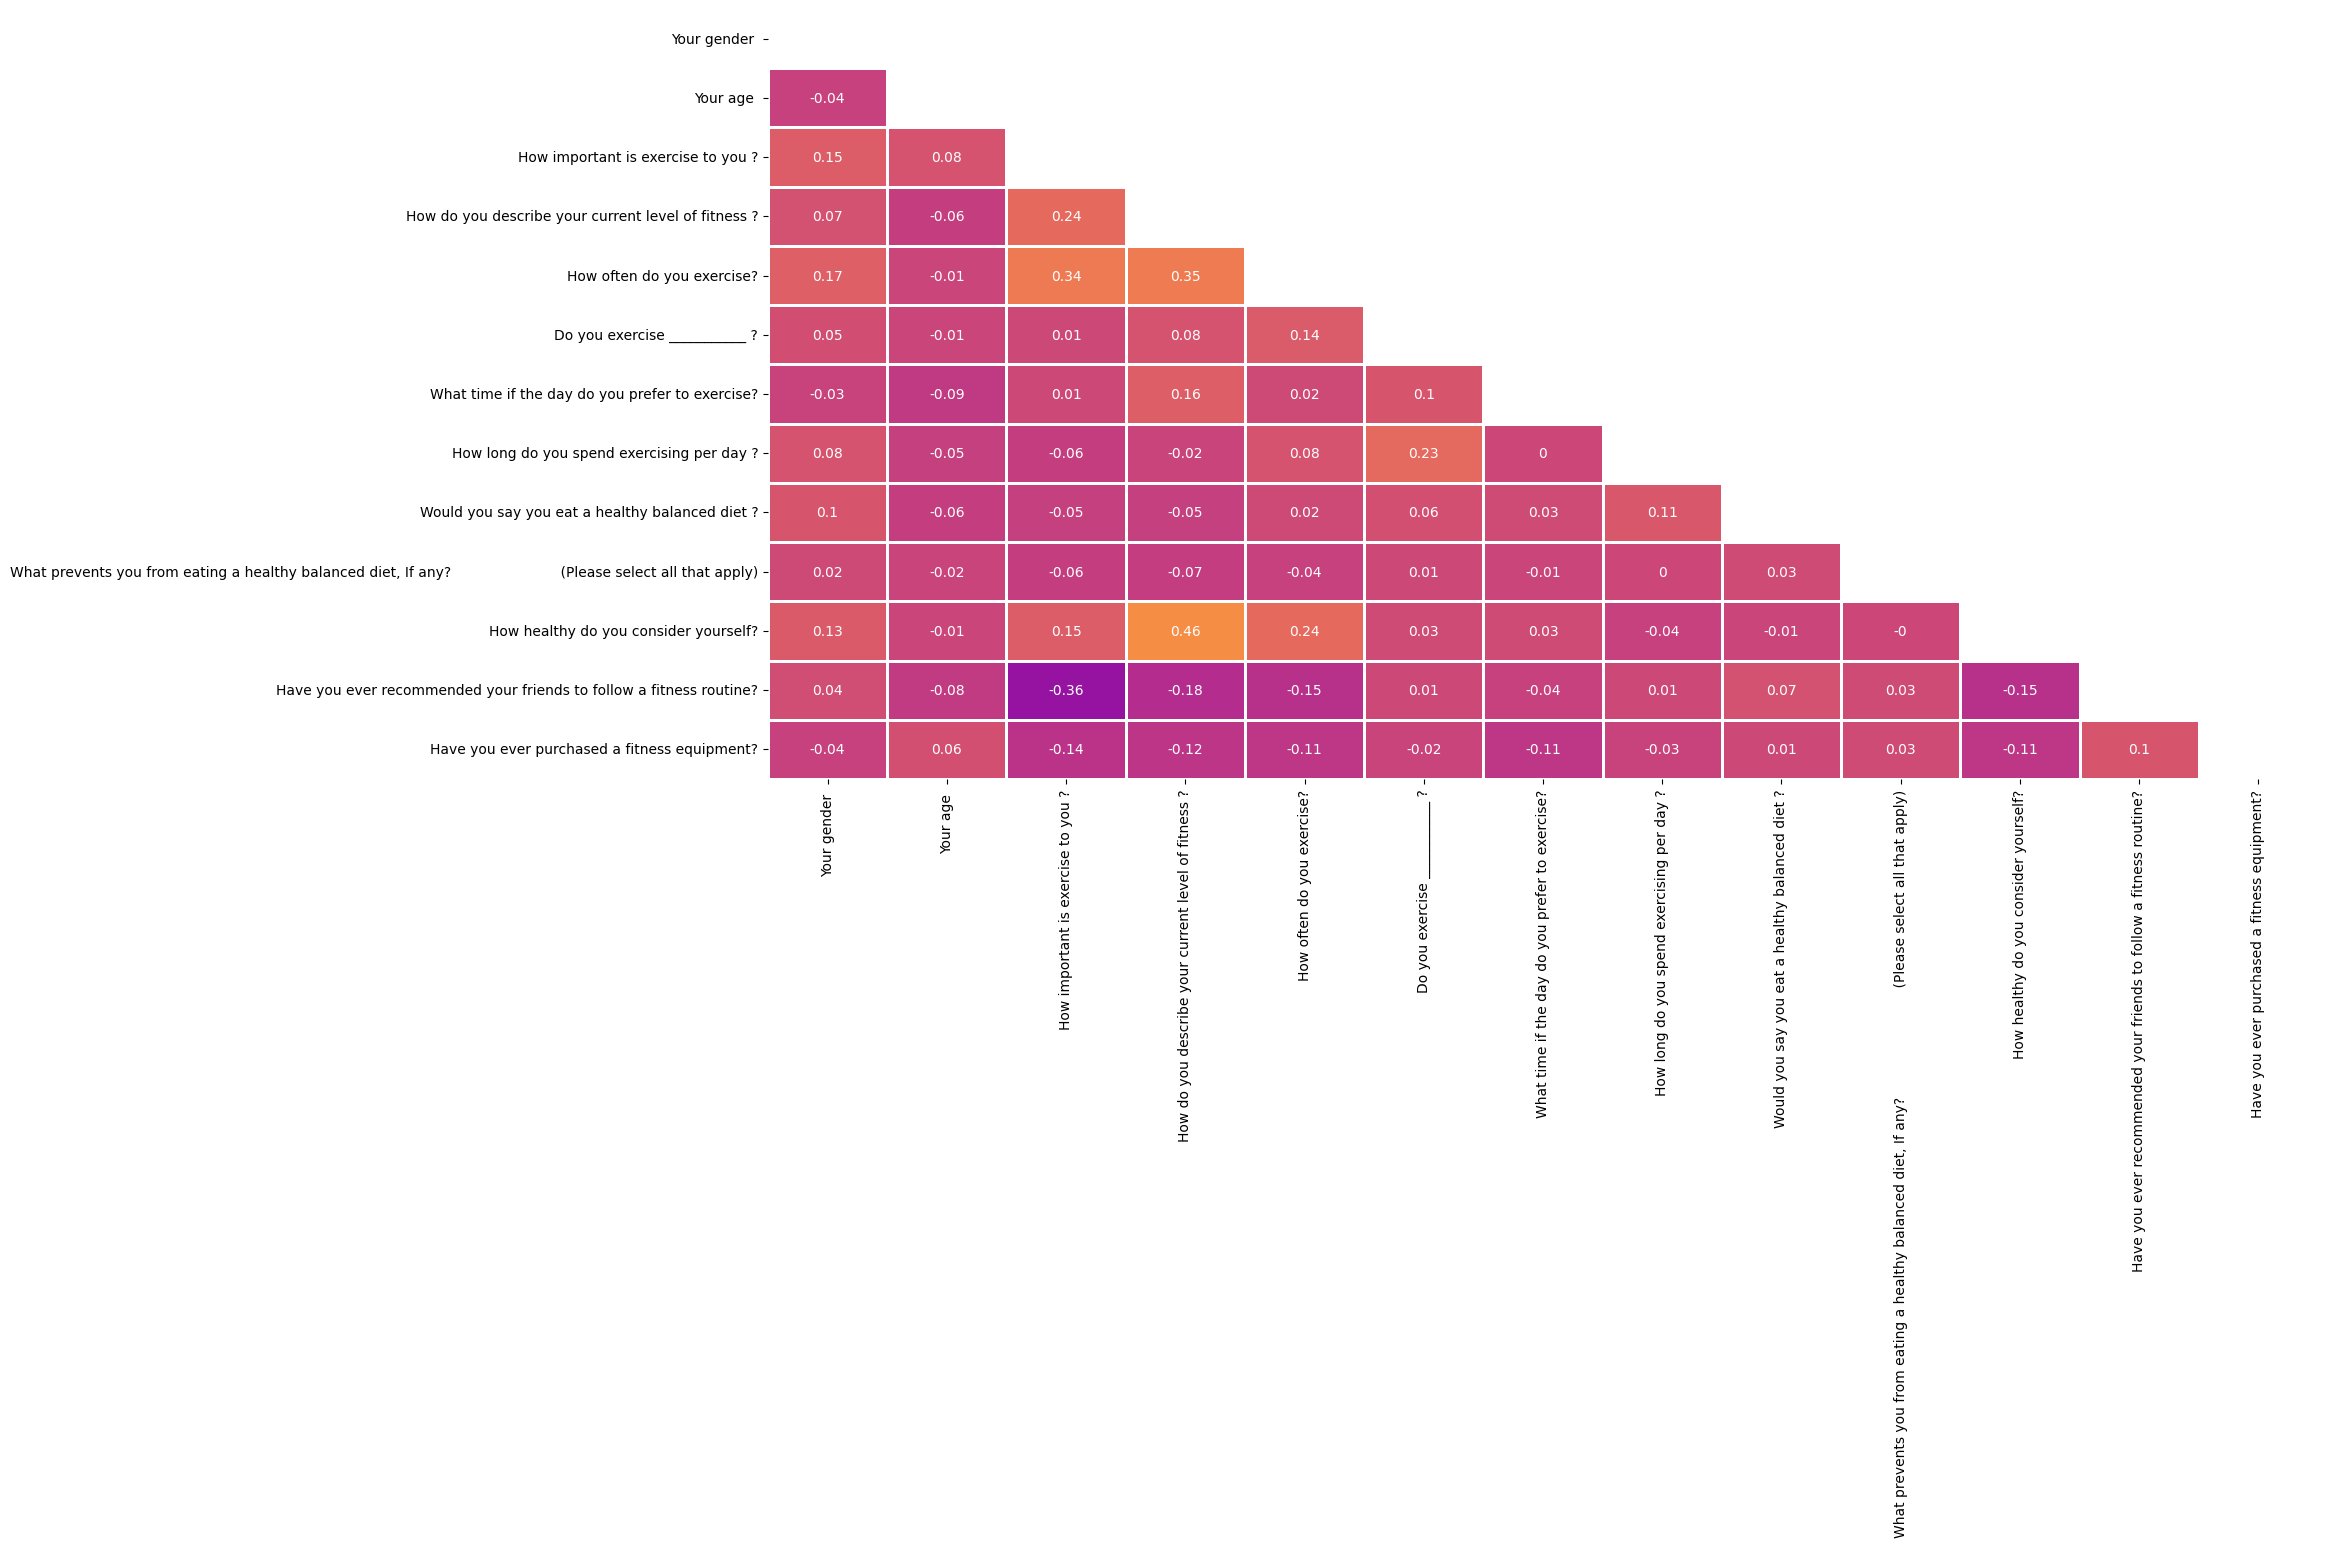

In [193]:
corr_mat = fitness3_5.corr().round(2)
plt.subplots(figsize = (20,10))
mask = np.zeros_like(corr_mat,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat,mask = mask,vmin = -1,vmax = 1,center = 0, cmap = 'plasma',square = False,lw = 2,annot = True,cbar = False)
plt.show() 

In [194]:
# Low correlation
fitness3_5 = fitness3_5.drop(['How long do you spend exercising per day ?'], axis=1)

### 7.1.6   Outliers treatment

In [195]:
fitness3_6 = fitness3_5.copy(deep = True)

In [196]:
fitness3_6_pc = fitness3_6.copy(deep = True)
Q1 = fitness3_6_pc.quantile(0.25) # 0.25
Q3 = fitness3_6_pc.quantile(0.75) # 0.75
IQR = Q3 - Q1
print(IQR)

Your gender                                                                                                              1.0
Your age                                                                                                                 2.0
How important is exercise to you ?                                                                                       2.0
How do you describe your current level of fitness ?                                                                      1.0
How often do you exercise?                                                                                               3.0
Do you exercise ___________ ?                                                                                            2.0
What time if the day do you prefer to exercise?                                                                          1.0
Would you say you eat a healthy balanced diet ?                                                                          1.0


In [197]:
fitness3_6_pc_out = fitness3_6_pc[~((fitness3_6_pc < (Q1 - 1.5 * IQR)) |(fitness3_6_pc > (Q3 + 1.5 * IQR))).any(axis=1)]

In [198]:
i, _ = fitness3_6.shape
o, _ = fitness3_6_pc_out.shape
print("Removed", i-o,"rows")
print("Rows count reduced from", i, "to", o,"resulting in", int((o/i)*100), "% of the initial rows" )

Removed 13 rows
Rows count reduced from 545 to 532 resulting in 97 % of the initial rows


In [199]:
fitness3_6 = fitness3_6_pc_out.copy(deep = True)

### 7.1.7   Train-test Split

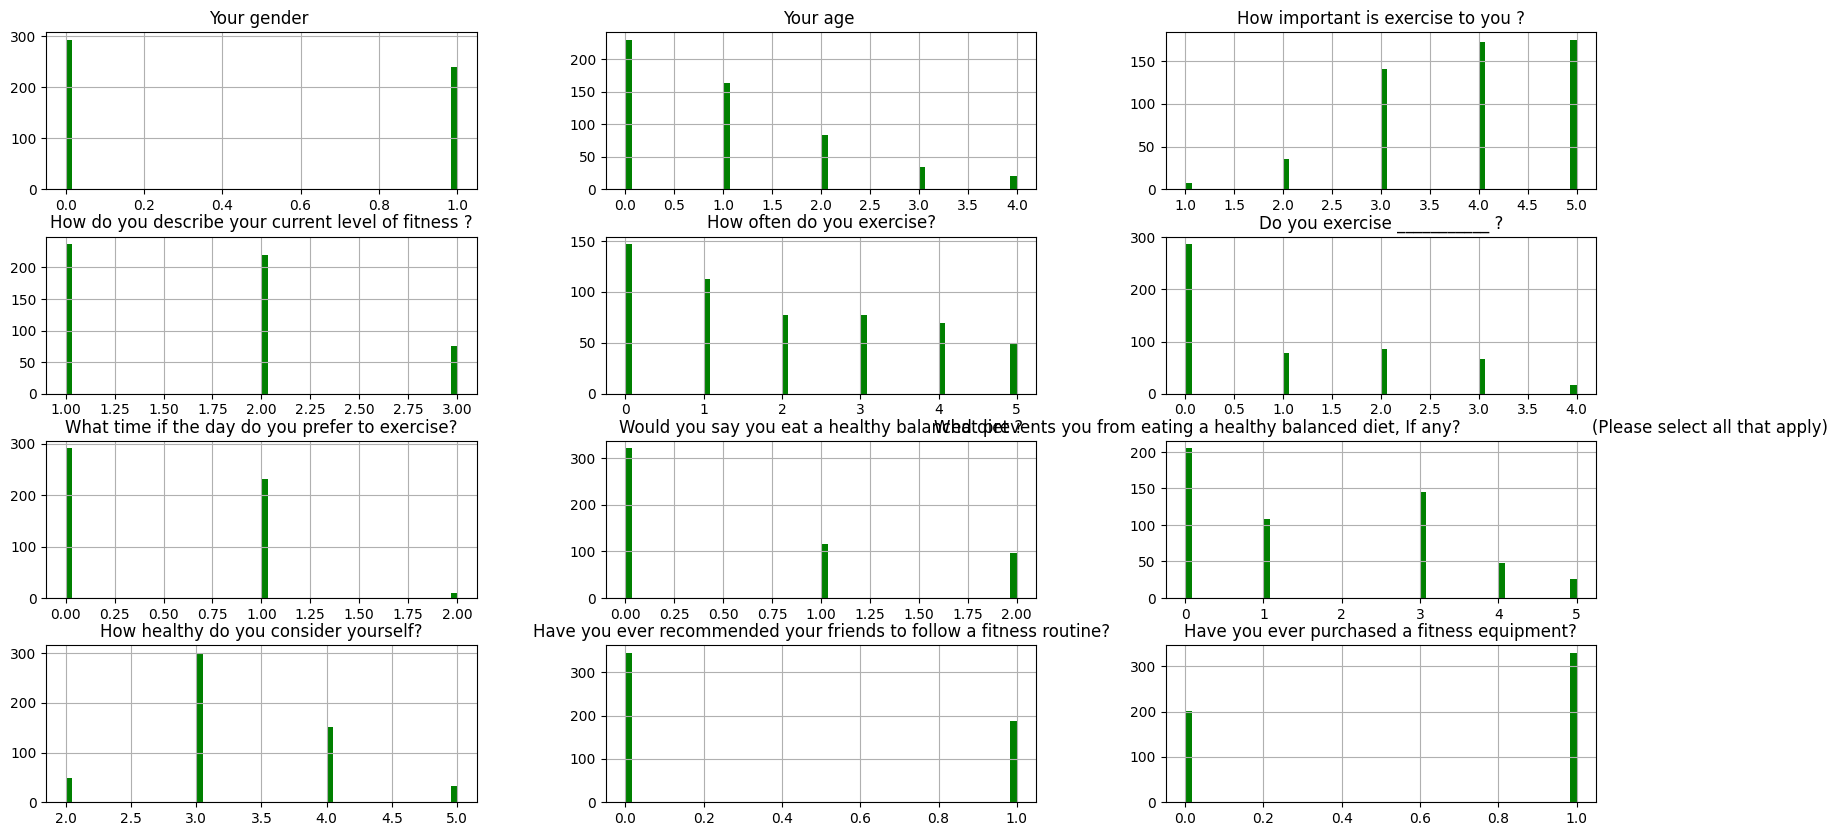

In [200]:
fitness3_6.hist(bins=60, figsize=(20,10), color='green')
plt.show()

1    237
2    219
3     76
Name: How do you describe your current level of fitness ?, dtype: int64

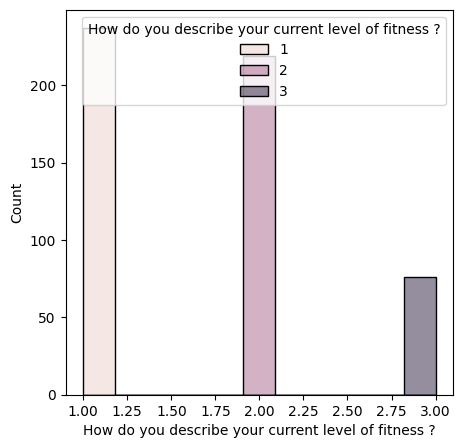

In [201]:
plt.figure(figsize=(5,5))
sns.histplot(data = fitness3_6, x = 'How do you describe your current level of fitness ?', hue = 'How do you describe your current level of fitness ?')
fitness3_6['How do you describe your current level of fitness ?'].value_counts()

In [202]:
x = fitness3_6.drop(['How do you describe your current level of fitness ?'], axis=1)
y = fitness3_6['How do you describe your current level of fitness ?']
#X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

## 7.2  Modeling & Evaluation

### 7.2.1   Random Forest

In [203]:
#rfc = RandomForestClassifier(n_estimators = 100, max_features = 'sqrt', max_depth= 200, bootstrap=False, random_state=0) 
rfc = RandomForestClassifier(n_estimators=1000, random_state=0)
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [204]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [205]:
y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print('Accuracy: {:d}%'.format(int(accuracy_rfc * 100)))

Accuracy: 68%


### 7.2.2  Performance Evaluation

[Text(0.4086945564516129, 0.9705882352941176, 'X[2] <= 3.5\ngini = 0.606\nsamples = 265\nvalue = [204, 161, 60]'),
 Text(0.1028225806451613, 0.9117647058823529, 'X[1] <= 2.5\ngini = 0.493\nsamples = 89\nvalue = [90, 36, 11]'),
 Text(0.09637096774193549, 0.8529411764705882, 'X[8] <= 2.5\ngini = 0.522\nsamples = 79\nvalue = [77, 36, 11]'),
 Text(0.025806451612903226, 0.7941176470588235, 'X[9] <= 0.5\ngini = 0.227\nsamples = 12\nvalue = [14, 1, 1]'),
 Text(0.012903225806451613, 0.7352941176470589, 'X[4] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.0064516129032258064, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.01935483870967742, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.03870967741935484, 0.7352941176470589, 'X[2] <= 2.5\ngini = 0.133\nsamples = 10\nvalue = [13, 0, 1]'),
 Text(0.03225806451612903, 0.6764705882352942, 'X[7] <= 1.5\ngini = 0.278\nsamples = 4\nvalue = [5, 0, 1]'),
 Text(0.025806451612903226, 0.

<Figure size 1500x1000 with 0 Axes>

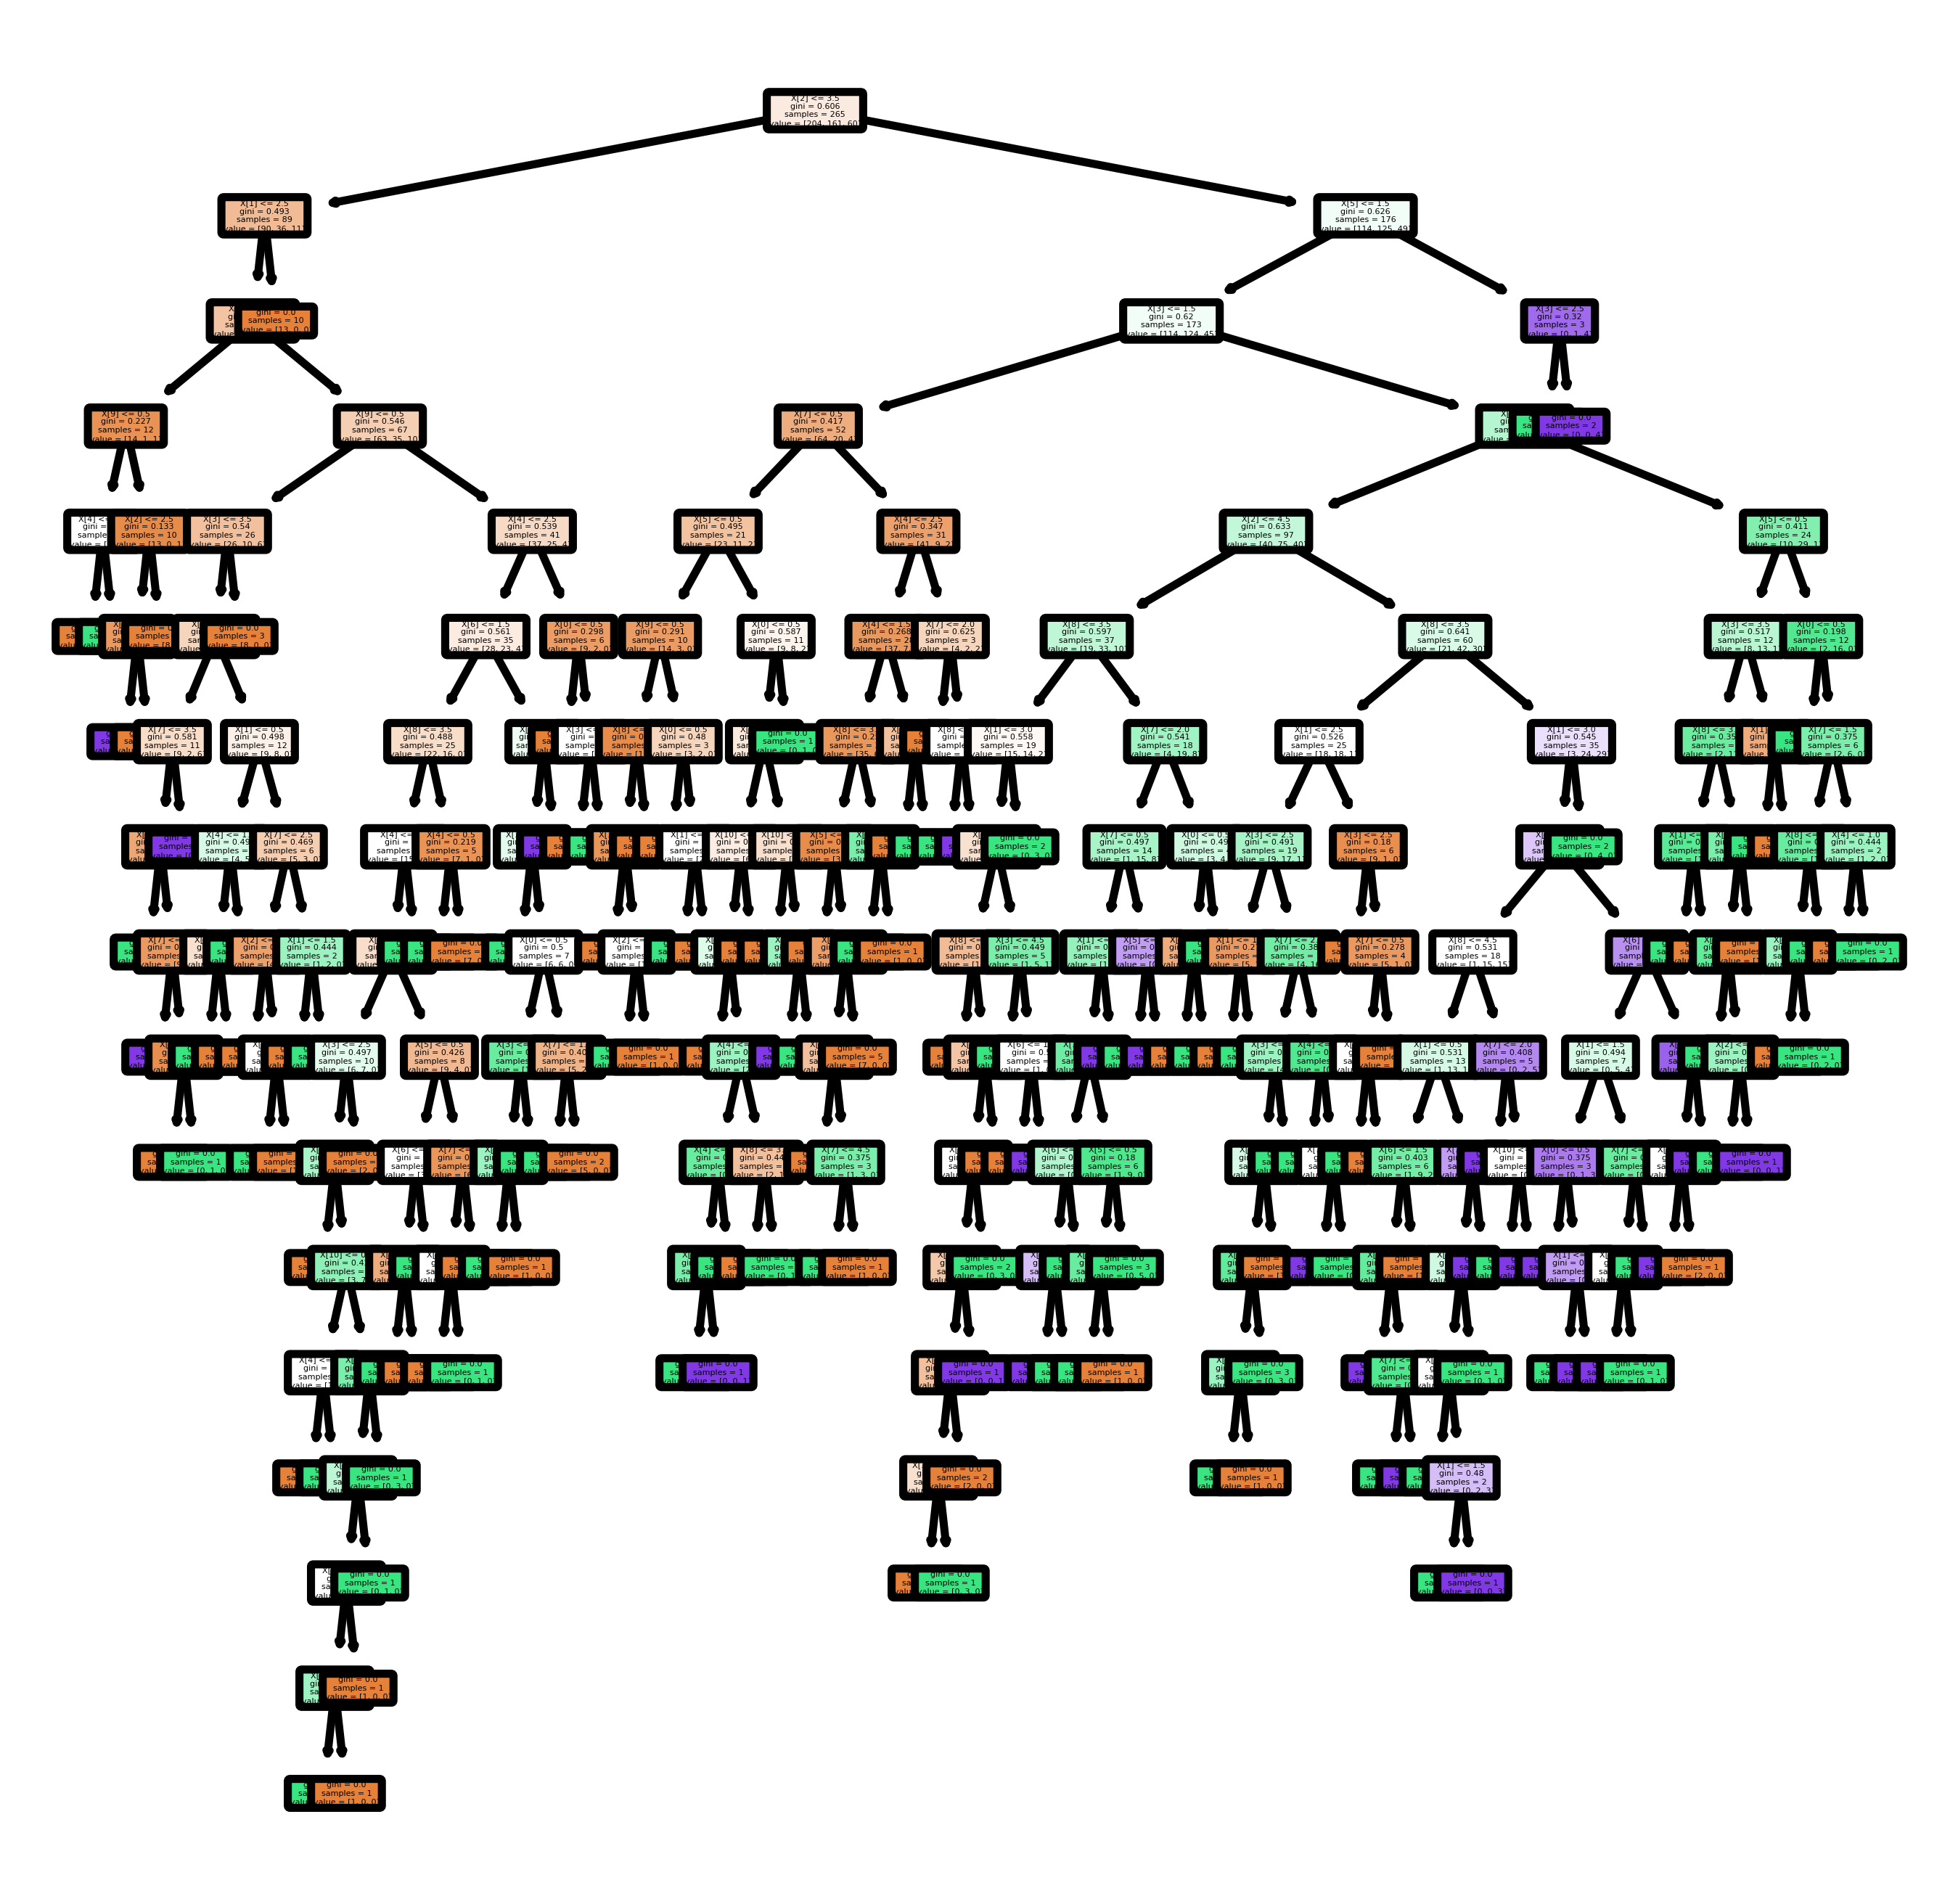

In [206]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(rfc.estimators_[0],  
          filled=True, impurity=True, 
          rounded=True)

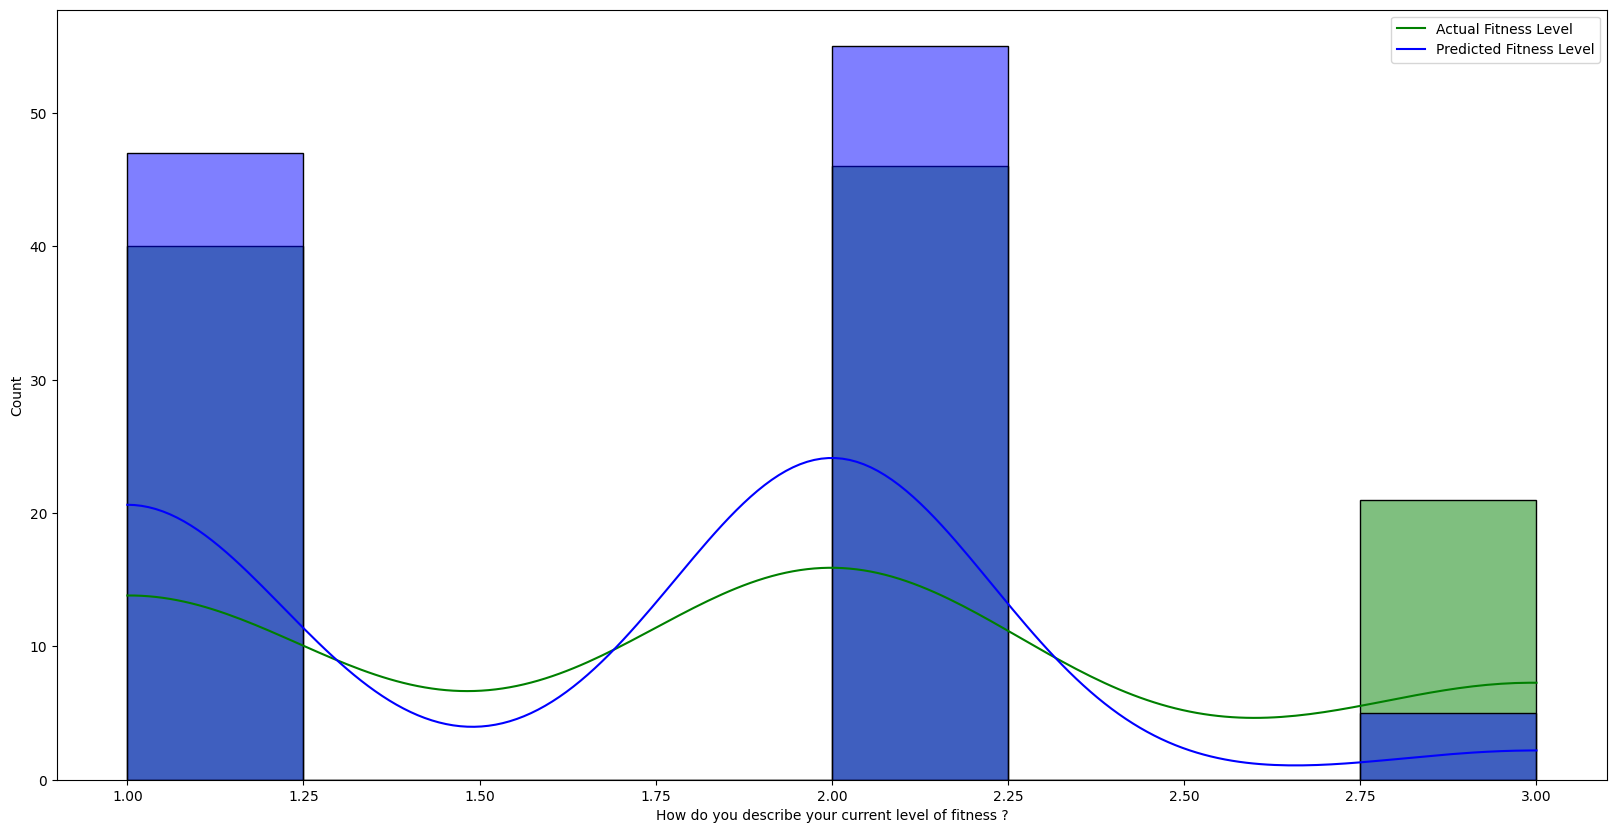

In [207]:
plt.figure(figsize=(20,10))
sns.histplot(data = y_test, kde = True, color='g')
sns.histplot(data = y_pred_rfc, kde = True, color='b')
plt.legend(labels=["Actual Fitness Level","Predicted Fitness Level"])

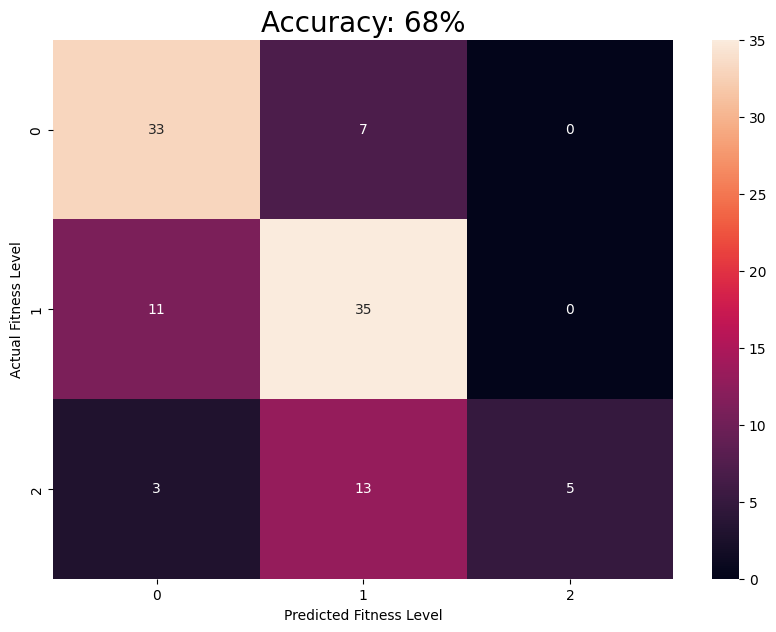

In [208]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt=".0f")
plt.xlabel('Predicted Fitness Level')
plt.ylabel('Actual Fitness Level')
plt.title('Accuracy: {:d}%'.format(int(accuracy_rfc * 100)), size = 20)
plt.show()

*TEXT*

# 8. Conclusions

*TEXT*